# Understanding and Improving Deep Convolutional Networks
>  There are many ways to improve training by neural networks. In this chapter, we will focus on our ability to track how well a network is doing, and explore approaches towards improving convolutional neural networks.

- toc: true 
- badges: true
- comments: true
- author: Lucas Nunes
- categories: [Datacamp, marked]
- image: images/datacamp/___

> Note: This is a summary of the course's chapter 4 exercises "Image Processing with Keras in Python" at datacamp. <br>[Github repo](https://github.com/lnunesAI/Datacamp/) / [Course link](https://www.datacamp.com/tracks/machine-learning-scientist-with-python)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (8, 8)
import tensorflow as tf

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout, BatchNormalization
from keras.callbacks import ModelCheckpoint
img_rows, img_cols = 28, 28

## Tracking learning

### Plot the learning curves

<p>During learning, the model will store the loss function evaluated in each epoch. Looking at the learning curves can tell us quite a bit about the learning process. In this exercise, you will plot the learning and validation loss curves for a model that you will train.</p>

In [26]:
%%capture
!wget https://github.com/lnunesAI/Datacamp/raw/main/2-machine-learning-scientist-with-python/19-image-processing-with-keras-in-python/datasets/fashion.h5
import h5py
h5f = h5py.File('fashion.h5','r')
train_data = h5f['train_data'][:]
train_labels = h5f['train_labels'][:]
test_data = h5f['test_data'][:]
test_labels = h5f['test_labels'][:]
h5f.close()

In [28]:
model = Sequential()
model.add(Conv2D(4, kernel_size=2, activation='relu', input_shape=(img_rows, img_cols, 1)))
model.add(MaxPool2D(2))
model.add(Conv2D(8, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

checkpoint = ModelCheckpoint('weights.hdf5', monitor='val_loss', save_best_only=True)

Instructions
<ul>
<li>Fit the model to the training data (<code>train_data</code>).</li>
<li>Use a validation split of 20%, 3 epochs and batch size of 10. </li>
<li>Plot the training loss.</li>
<li>Plot the validation loss.</li>
</ul>

Epoch 1/3
4/4 [==============================] - 1s 144ms/step - loss: 0.9830 - accuracy: 0.4767 - val_loss: 0.8743 - val_accuracy: 0.7000
Epoch 2/3
4/4 [==============================] - 0s 18ms/step - loss: 0.8628 - accuracy: 0.7067 - val_loss: 0.7065 - val_accuracy: 0.9000
Epoch 3/3
4/4 [==============================] - 0s 16ms/step - loss: 0.7506 - accuracy: 0.6533 - val_loss: 0.6316 - val_accuracy: 0.9000


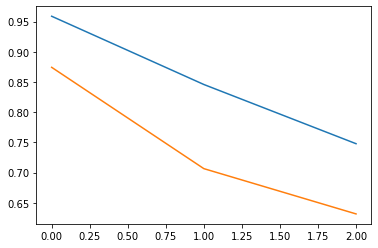

In [29]:
# Train the model and store the training object
training = model.fit(train_data, train_labels, validation_split=0.2, epochs=3, batch_size=10, callbacks=[checkpoint])

# Extract the history from the training object
history = training.history

# Plot the training loss 
plt.plot(history['loss'])
# Plot the validation loss
plt.plot(history['val_loss'])

# Show the figure
plt.show()

**If you continue for many epochs, the validation loss will start going back up.**

### Using stored weights to predict in a test set

<p>Model weights stored in an <code>hdf5</code> file can be reused to populate an untrained model. Once the weights are loaded into this model, it behaves just like a model that has been trained to reach these weights. For example, you can use this model to make predictions from an unseen data set (e.g. <code>test_data</code>).</p>

Instructions
<ul>
<li>Load the weights from a file called <code>'weights.hdf5'</code>. </li>
<li>Predict the classes of the first three images from <code>test_data</code>.</li>
</ul>

In [30]:
# Load the weights from file
model.load_weights('weights.hdf5')

# Predict from the first three images in the test data
model.predict(test_data[0:3])

array([[0.30573392, 0.27002484, 0.42424124],
       [0.36280116, 0.25803617, 0.37916267],
       [0.328414  , 0.53421813, 0.13736786]], dtype=float32)

## Regularization

### Adding dropout to your network

<div class=""><p>Dropout is a form of regularization that removes a different random subset of the units in a layer in each round of training. In this exercise, we will add dropout to the convolutional neural network that we have used in previous exercises: </p>
<ol>
<li>Convolution (15 units, kernel size 2, 'relu' activation)</li>
<li>Dropout (20%) </li>
<li>Convolution (5 units, kernel size 2, 'relu' activation) </li>
<li>Flatten</li>
<li>Dense (3 units, 'softmax' activation)</li>
</ol>
<p>A Sequential <code>model</code> along with <code>Dense</code>, <code>Conv2D</code>, <code>Flatten</code>, and <code>Dropout</code> objects are available in your workspace.</p></div>

In [7]:
model = Sequential()

Instructions
<ul>
<li>Add dropout applied to the first layer with 20%. </li>
<li>Add a flattening layer.</li>
</ul>

In [8]:
# Add a convolutional layer
model.add(Conv2D(15, kernel_size=2, activation='relu', 
                 input_shape=(img_rows, img_cols, 1)))

# Add a dropout layer
model.add(Dropout(0.2))

# Add another convolutional layer
model.add(Conv2D(5, kernel_size=2, activation='relu'))

# Flatten and feed to output layer
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

### Add batch normalization to your network

<div class=""><p>Batch normalization is another form of regularization that rescales the outputs of a layer to make sure that they have mean 0 and standard deviation 1. In this exercise, we will add batch normalization to the convolutional neural network that we have used in previous exercises: </p>
<ol>
<li>Convolution (15 units, kernel size 2, 'relu' activation)</li>
<li>Batch normalization </li>
<li>Convolution (5 unites, kernel size 2, 'relu' activation) </li>
<li>Flatten</li>
<li>Dense (3 units, 'softmax' activation)</li>
</ol>
<p>A Sequential <code>model</code> along with <code>Dense</code>, <code>Conv2D</code>, <code>Flatten</code>, and <code>Dropout</code> objects are available in your workspace.</p></div>

In [9]:
model = Sequential()

Instructions
<ul>
<li>Add the first convolutional layer. You can use the <code>img_rows</code> and <code>img_cols</code> objects available in your workspace to define the <code>input_shape</code> of this layer. </li>
<li>Add batch normalization applied to the outputs of the first layer.</li>
</ul>

In [10]:
# Add a convolutional layer
model.add(Conv2D(15, kernel_size=2, activation='relu', input_shape=(img_rows, img_cols, 1)))

# Add batch normalization layer
model.add(BatchNormalization())

# Add another convolutional layer
model.add(Conv2D(5, kernel_size=2, activation='relu'))

# Flatten and feed to output layer
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

## Interpreting the model

### Extracting a kernel from a trained network

<p>One way to interpret models is to examine the properties of the kernels in the convolutional layers. In this exercise, you will extract one of the kernels from a convolutional neural network with weights that you saved in a <code>hdf5</code> file.</p>

In [31]:
model = Sequential()
model.add(Conv2D(5, kernel_size=2, activation='relu', input_shape=(img_rows, img_cols, 1)))
model.add(Conv2D(15, kernel_size=2, activation='relu'))
model.add(MaxPool2D(2))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))
model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
checkpoint = ModelCheckpoint('weights.hdf5', monitor='val_loss', save_best_only=True)
model.fit(train_data, train_labels, epochs=3, validation_split=0.2, batch_size=10,
          callbacks=[checkpoint]);

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 27, 27, 5)         25        
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 26, 26, 15)        315       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 15)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 2535)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 7608      
Total params: 7,948
Trainable params: 7,948
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
4/4 [==============================] - 1s 81ms/step - loss: 1.1086 - accuracy: 0.1700 - val_loss: 0.9027 - v

Instructions
<ul>
<li>Load the weights into the model from the file <code>weights.hdf5</code>. </li>
<li>Get the first convolutional layer in the model from the <code>layers</code> attribute. </li>
<li>Use the <code>.get_weights()</code> method to extract the weights from this layer.</li>
</ul>

In [32]:
# Load the weights into the model
model.load_weights('weights.hdf5')

# Get the first convolutional layer from the model
c1 = model.layers[0]

# Get the weights of the first convolutional layer
weights1 = c1.get_weights()

# Pull out the first channel of the first kernel in the first layer
kernel = weights1[0][...,0, 0]
print(kernel)

[[-0.12159088 -0.3377506 ]
 [ 0.3799053   0.2846366 ]]


**You can extract the weights from other layers too.**

### Shape of the weights

<p>A <code>Keras</code> neural network stores its layers in a list called <code>model.layers</code>. For the convolutional layers, you can get the weights using the <code>.get_weights()</code> method. This returns a list, and the first item in this list is an array representing the weights of the convolutional kernels. If the shape of this array is <code>(2, 2, 1, 5)</code>, what does the first number (<code>2</code>) represent?</p>

In [33]:
kernel.shape

(2, 2)

<pre>
Possible Answers

There are 2 channels in black and white images.

<b>The kernel size is 2 by 2.</b>

The model used a convolutional unit with 2 dimensions.

There are 2 convolutional layers in the network.

</pre>

**each of the 2s in this shape is one of the dimensions of the kernel.**

### Visualizing kernel responses

<div class=""><p>One of the ways to interpret the weights of a neural network is to see how the kernels stored in these weights "see" the world. That is, what properties of an image are emphasized by this kernel. In this exercise, we will do that by convolving an image with the kernel and visualizing the result. Given images in the <code>test_data</code> variable, a function called <code>extract_kernel()</code> that extracts a kernel from the provided network, and the function called <code>convolution()</code> that we defined in the first chapter, extract the kernel, load the data from a file and visualize it with <code>matplotlib</code>.</p>
<p>A deep CNN <code>model</code>, a function <code>convolution()</code>, along with the <code>kernel</code> you extracted in an earlier exercise is available in your workspace. </p>
<p>Ready to take your deep learning to the next level? Check out <a href="https://www.datacamp.com/courses/advanced-deep-learning-with-keras-in-python" target="_blank" rel="noopener noreferrer">Advanced Deep Learning with Keras in Python</a> to see how the Keras functional API lets you build domain knowledge to solve new types of problems.</p></div>

In [34]:
def convolution(image, kernel):
    kernel = kernel - kernel.mean()
    result = np.zeros(image.shape)

    for ii in range(image.shape[0]-2):
        for jj in range(image.shape[1]-2):
            result[ii, jj] = np.sum(image[ii:ii+2, jj:jj+2] * kernel)

    return result

Instructions
<ul>
<li>Use the <code>convolution()</code> function to convolve the extracted kernel with the first channel of the fourth item in the image array.</li>
<li>Visualize the resulting convolution with <code>imshow()</code>.</li>
</ul>

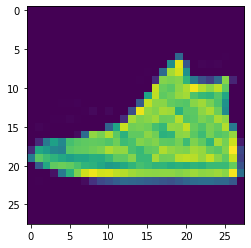

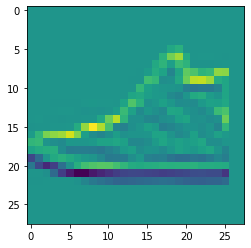

In [36]:
import matplotlib.pyplot as plt

# Convolve with the fourth image in test_data
out = convolution(test_data[3, :, :, 0], kernel)

# Visualize the result
plt.imshow(test_data[3, :, :, 0])
plt.show()
plt.imshow(out)
plt.show()

**You can keep going and visualize the kernel responses for all the kernels in this layer!**